In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.linalg import svd
from matplotlib.pyplot import *
%matplotlib widget

In [3]:
import sys
sys.path.append("../")

import numerical_methods as Sim

# Example

### In this file we exemplify how to run a simple example using a two feature configuration. 

###### Remark: The methodology is general for any type of input encoding but the shape of the arrays must be respected.

# Initiate Solver

In [4]:
shape = (200,200)
filter_radius = 15

PELMSim = Sim.PELM_algsolver(shape, filter_radius)

# Make input features

###### Remark: The shape of the input feature array must follow the requirements of the function that embedds these on the spatial modes basis.

In [5]:
F = 10
f = np.linspace(0,1,F)

feature_points = np.zeros((2, 2*F, 1))
feature_points[0,:F,0] = f
feature_points[1,F:,0] = f

# Config
encoding_shape = (10,10)

# Embedding masks

##### For the input masks to work with the simulator it must have the shape (N_examples, width, height).

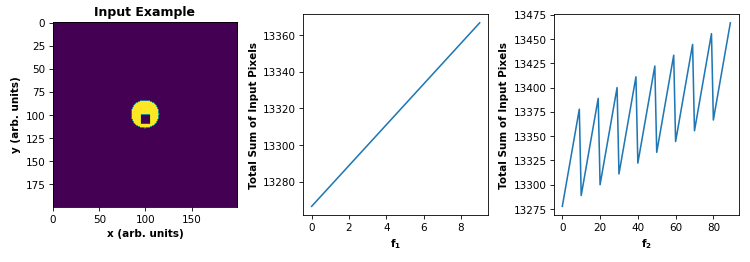

In [6]:
## Generate Input Profiles
input_masks = Sim.ContinuosFeatures(f, f, encoding_shape, shape, ref=1/3)  ## More types of encodings on the masks.py file

fig, axs = subplots(1, 3, figsize=(10,3.5))
axs[0].imshow(input_masks[3]*PELMSim.filter)
axs[0].set_title("Input Example", weight="bold")

axs[0].set_xlabel("x (arb. units)", weight="bold")
axs[0].set_ylabel("y (arb. units)", weight="bold")

axs[1].plot(np.sum(input_masks[:F], axis=(1,2)))
axs[1].set_xlabel(r"$\mathbf{f_1}$")
axs[1].set_ylabel("Total Sum of Input Pixels", weight="bold")

axs[2].plot(np.sum(input_masks[F:], axis=(1,2)))
axs[2].set_xlabel(r"$\mathbf{f_2}$")
axs[2].set_ylabel("Total Sum of Input Pixels", weight="bold")

fig.tight_layout()

# Run simulation

In [7]:
hidden_features = PELMSim.solver(input_masks, normed=True, noise=5)

Text(0, 0.5, 'y (arb. units)')

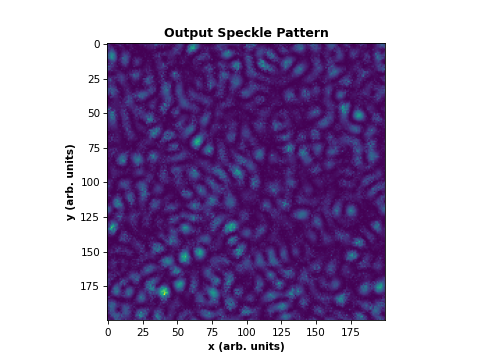

In [8]:
fig, axs = subplots(1)
axs.imshow(hidden_features[0])

axs.set_title("Output Speckle Pattern", weight="bold")

axs.set_xlabel("x (arb. units)", weight="bold")
axs.set_ylabel("y (arb. units)", weight="bold")